# Working with Jupyter Notebooks
In this notebook we are going to work with Jupyter Notebooks. We will:
1. Load different TF databases.
2. Do some simple word-based queries.
3. Export query results to TSV files.
4. Analysing our query results with `pandas`.
5. Explore simple graphing methods for visualizing our query results.

# Starting a Jupyter Notebook
Open the Anaconda console (Prompt) and type the following command:
```jupyter notebook```

Now a notebook will open in your webbrowser. Copy/Past the code cells from this notebook into your own notebook or download this notebook to your machine and open it as a jupyter notebook.

## Getting the TF workbench ready
We have to do two things first:
1. Loading the TF program
2. Loading the TF database

In [256]:
# First we load the TF program
from tf.fabric import Fabric
from tf.app import use

In [257]:
# Now we load the TF bhsa database
BHS = use('bhsa', hoist=globals())

In [258]:
# Now we load the TF tisch database
NT = use('tisch', hoist=globals())

We have now both the BHS as well as the NT Tischendorf text loaded and are ready to do some simple querying.

# Some simple word based queries...
Lets search in the BHS the word Abram (>BRM/) and Abraham (>BRHM/) by typing

> `word lex=>BRHM/|>BRM/`

The `|` stands for the AND-OR

In [259]:
# Searching for "Abram" and "Abraham" in the OT
BHSAbrahamSearch = '''
word lex=>BRHM/|>BRM/
'''
BHSAbrahamSearch  = BHS.search(BHSAbrahamSearch)
BHS.table(BHSAbrahamSearch, start=1, end=10, condensed=True)

  0.98s 236 results


How often does Abraham appear in the NT?

In [260]:
# Searching for "Abraham" in the NT
NTAbrahamSearch = '''
word anlex_lem=Ἀβραάμ
'''
NTAbrahamSearch  = NT.search(NTAbrahamSearch)
NT.show(NTAbrahamSearch, start=1, end=7, condensed=False)

  0.32s 73 results


Do you see the difference between `condensed=False` and `condensed=True`?

# Query-result export for Data Mining
We have to export our query results into TSV files to that we can do some further data analysis.

In [261]:
BHS.export(BHSAbrahamSearch, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='BHSAbrahamSearch.tsv')

In [262]:
NT.export(NTAbrahamSearch, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='NTAbrahamSearch.tsv')

Lets now read the TSV files and do some further analysis of them. To enable data analysis functions we need to load some further python modules:

In [263]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

Now we can load our TSV files as pandas dataframes

In [264]:
BHSAbrahamSearch=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/BHSAbrahamSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
BHSAbrahamSearch.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
0,1,Genesis,11,26,5366,word,אַבְרָ֔ם,>BRM/
1,2,Genesis,11,27,5379,word,אַבְרָ֔ם,>BRM/
2,3,Genesis,11,29,5405,word,אַבְרָ֧ם,>BRM/
3,4,Genesis,11,29,5412,word,אַבְרָם֙,>BRM/
4,5,Genesis,11,31,5437,word,אַבְרָ֣ם,>BRM/


In [265]:
NTAbrahamSearch=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/NTAbrahamSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
NTAbrahamSearch.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,anlex_lem1
0,1,Matthew,1,1,8,word,Ἀβραάμ.,Ἀβραάμ
1,2,Matthew,1,2,9,word,Ἀβραὰμ,Ἀβραάμ
2,3,Matthew,1,17,252,word,Ἀβραὰμ,Ἀβραάμ
3,4,Matthew,3,9,1032,word,"Ἀβραάμ,",Ἀβραάμ
4,5,Matthew,3,9,1047,word,Ἀβραάμ.,Ἀβραάμ


# Some simple data mining operations
## `groupby` particular *column* by `sum` and  `count`

In [266]:
BHSAbrahamSearch.groupby(["lex1"]).sum()

,R,S2,S3,NODE1
lex1,,,,
>BRHM/,25742,4209,2704,10028097
>BRM/,2224,829,684,1155649


In [267]:
BHSAbrahamSearch.groupby(["lex1"]).count()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1
lex1,,,,,,,
>BRHM/,175,175,175,175,175,175,175
>BRM/,61,61,61,61,61,61,61


In [268]:
BHSAbrahamSearch.groupby(["lex1"]).count().sum()

R        236
S1       236
S2       236
S3       236
NODE1    236
TYPE1    236
TEXT1    236
dtype: int64

In [269]:
NTAbrahamSearch.groupby(["S1"]).count()

,R,S2,S3,NODE1,TYPE1,TEXT1,anlex_lem1
S1,,,,,,,
1_Peter,1,1,1,1,1,1,1
2_Corinthians,1,1,1,1,1,1,1
Acts,7,7,7,7,7,7,7
Galatians,9,9,9,9,9,9,9
Hebrews,10,10,10,10,10,10,10
James,2,2,2,2,2,2,2
John,11,11,11,11,11,11,11
Luke,15,15,15,15,15,15,15
Mark,1,1,1,1,1,1,1


## `groupby` particular *column* by `count` and `sort_values`

In [271]:
NTAbrahamSearch.groupby(['S1']).count().sort_values(['anlex_lem1'], ascending=False)

,R,S2,S3,NODE1,TYPE1,TEXT1,anlex_lem1
S1,,,,,,,
Luke,15,15,15,15,15,15,15
John,11,11,11,11,11,11,11
Hebrews,10,10,10,10,10,10,10
Galatians,9,9,9,9,9,9,9
Romans,9,9,9,9,9,9,9
Acts,7,7,7,7,7,7,7
Matthew,7,7,7,7,7,7,7
James,2,2,2,2,2,2,2
1_Peter,1,1,1,1,1,1,1


## Finding a value with `==`

In [272]:
BHSAbrahamSearch[(BHSAbrahamSearch['lex1'] == '>BRM/')]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
0,1,Genesis,11,26,5366,word,אַבְרָ֔ם,>BRM/
1,2,Genesis,11,27,5379,word,אַבְרָ֔ם,>BRM/
2,3,Genesis,11,29,5405,word,אַבְרָ֧ם,>BRM/
3,4,Genesis,11,29,5412,word,אַבְרָם֙,>BRM/
4,5,Genesis,11,31,5437,word,אַבְרָ֣ם,>BRM/
...,...,...,...,...,...,...,...,...
56,57,Genesis,17,1,7337,word,אַבְרָ֗ם,>BRM/
57,58,Genesis,17,3,7364,word,אַבְרָ֖ם,>BRM/
58,59,Genesis,17,5,7389,word,אַבְרָ֑ם,>BRM/
225,226,Nehemiah,9,7,387894,word,אַבְרָ֔ם,>BRM/


## Finding a value with `!=`

In [273]:
BHSAbrahamSearch[(BHSAbrahamSearch['lex1'] != '>BRM/')]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
59,60,Genesis,17,5,7393,word,אַבְרָהָ֔ם,>BRHM/
60,61,Genesis,17,9,7464,word,אַבְרָהָ֔ם,>BRHM/
61,62,Genesis,17,15,7567,word,אַבְרָהָ֔ם,>BRHM/
62,63,Genesis,17,17,7599,word,אַבְרָהָ֛ם,>BRHM/
63,64,Genesis,17,18,7624,word,אַבְרָהָ֖ם,>BRHM/
...,...,...,...,...,...,...,...,...
231,232,1_Chronicles,1,34,391594,word,אַבְרָהָ֖ם,>BRHM/
232,233,1_Chronicles,16,16,399828,word,אַבְרָהָ֔ם,>BRHM/
233,234,1_Chronicles,29,18,406526,word,אַבְרָהָ֞ם,>BRHM/
234,235,2_Chronicles,20,7,416124,word,אַבְרָהָ֥ם,>BRHM/


# Finding values with `&` 

In [274]:
BHSAbrahamSearch[
          (BHSAbrahamSearch['lex1'] == '>BRM/')
        & (BHSAbrahamSearch['S1'] != 'Genesis')
                ]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
225,226,Nehemiah,9,7,387894,word,אַבְרָ֔ם,>BRM/
227,228,1_Chronicles,1,27,391518,word,אַבְרָ֖ם,>BRM/


In [275]:
BHSAbrahamSearch[
          (BHSAbrahamSearch['lex1'] == '>BRM/')
        & (BHSAbrahamSearch['R'] > 59 )
                ]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
225,226,Nehemiah,9,7,387894,word,אַבְרָ֔ם,>BRM/
227,228,1_Chronicles,1,27,391518,word,אַבְרָ֖ם,>BRM/


In [276]:
BHSAbrahamSearch[
          (BHSAbrahamSearch['lex1'] == '>BRM/')
        & (BHSAbrahamSearch['S1'] == 'Genesis')
        & (BHSAbrahamSearch['S2'] > 17 )
                ]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1


In Genesis "Abram" does not appear after chapter 17.

# Data Visualization
## Simple Bar Plotting

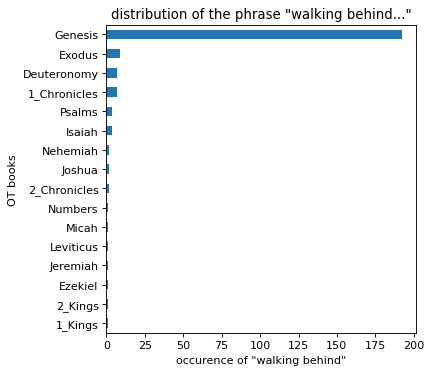

In [277]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
BHSAbrahamSearch.groupby("S1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('occurence of "walking behind"')
plt.ylabel('OT books')
plt.title('distribution of the phrase "walking behind..."')
plt.show()

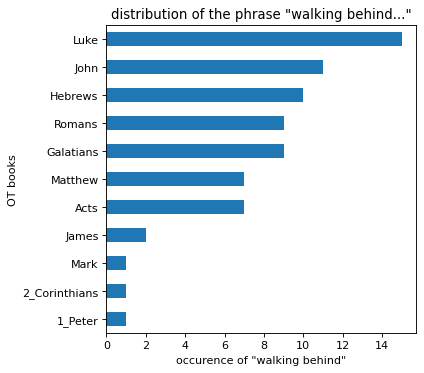

In [278]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
NTAbrahamSearch.groupby("S1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('occurence of "walking behind"')
plt.ylabel('OT books')
plt.title('distribution of the phrase "walking behind..."')
plt.show()

## Simple Scatter-Plotting

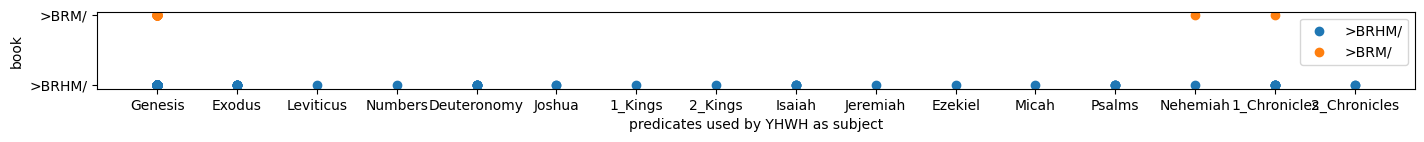

In [279]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 1)

for S1, df in BHSAbrahamSearch.groupby('lex1'):
    ax.scatter(x="S1", y="lex1", data=df, label=S1)

ax.set_xlabel("predicates used by YHWH as subject")
ax.set_ylabel("book")
ax.legend();

## Simple ImPlotting with Seaborn

Text(0.5, 28.999999999999986, 'OT books')

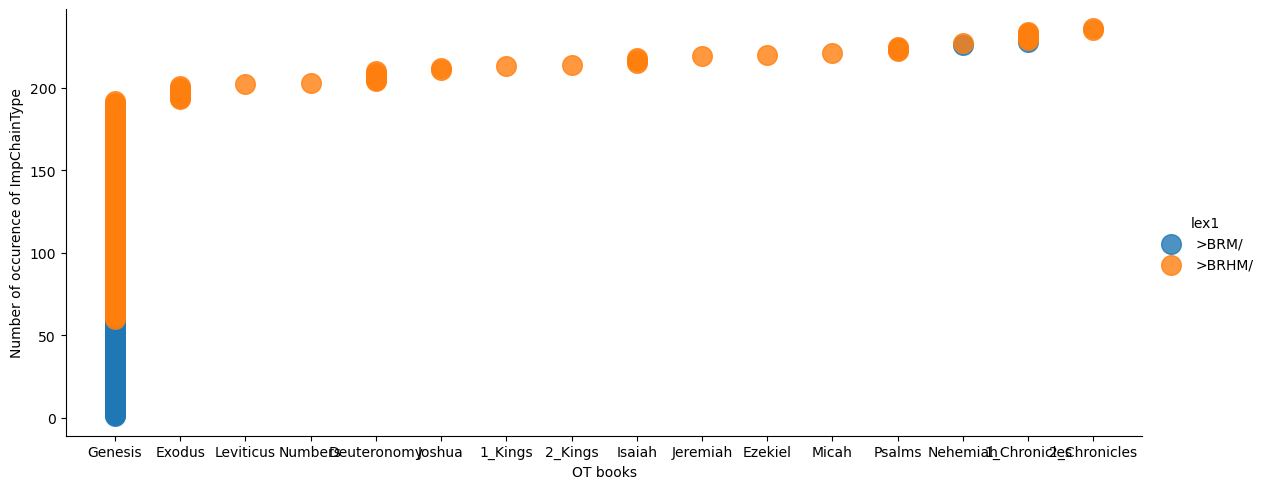

In [280]:
sns.lmplot(x="S1", y="R", data=BHSAbrahamSearch, hue='lex1', height=5, aspect=7/3, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('Number of occurence of ImpChainType')
ax.set_xlabel('OT books')

Text(0.5, 28.999999999999986, 'OT books')

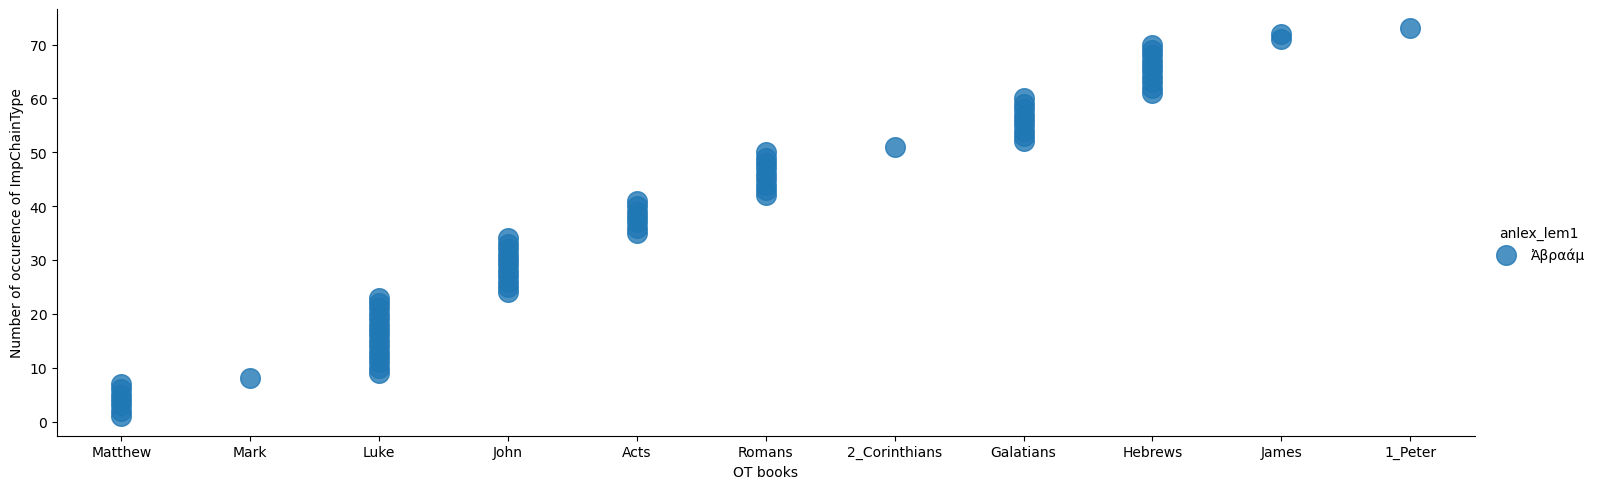

In [281]:
sns.lmplot(x="S1", y="R", data=NTAbrahamSearch, hue='anlex_lem1', height=5, aspect=9/3, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('Number of occurence of ImpChainType')
ax.set_xlabel('OT books')

## Simple Pie-Plotting

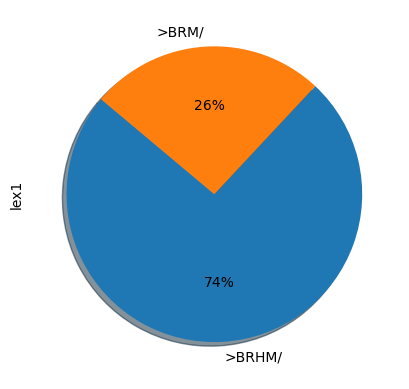

In [282]:
BHSAbrahamSearch.lex1.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=140)
plt.show()

# Assignments
1. Think of two words that you would like to search in both the BHS and the NT(Tischendorf). For example יהוה/κύριος and אֱלֹהִים/θεός. Since you do not yet know how to write your word in a TF accaptable way you can simple look up the book/chapter/verse where they appear. In BHS this would look like:

```
book book=yourbook
 chapter chapter=yourchapter
  verse verse=yourverse
   word lex
```

For Tischendorf this would look like:
```
book book=yourbook
 chapter chapter=yourchapter
  verse verse=yourverse
   word anlex_lem
```
In both cases run the `show` command instead of the `table` command. This will enable you to copy paste the correct writing into your word search query.

2. Search for your words in both the BHS and the NT.
3. In which book does that word appear most often (BHS and NT)?
4. Make a simple plot of your choice to represent your query result

# Whats Next?: Complex Query building
1. We will learn the basic architecture of the BHS and the Tischendorf database.
2. Understanding the database better will allow us to build sophisticated queries, including syntax queries...